In [1]:
import os

In [2]:
data_dir = './cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path + 'parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [9]:
para_cell = train_path + 'parasitized' + '/' + 'C189P150ThinF_IMG_20151203_142224_cell_84.png'

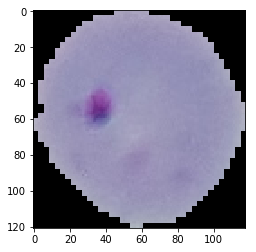

In [10]:
plt.imshow(imread(para_cell))

In [11]:
os.listdir(train_path+'uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [12]:
uninfected_cell = train_path+'uninfected/' + 'C13NThinF_IMG_20150614_131318_cell_179.png'

In [13]:
uninfected_cell = imread(uninfected_cell)

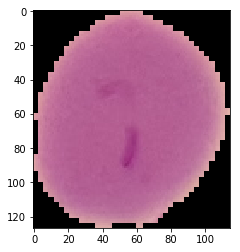

In [14]:
plt.imshow(uninfected_cell)

In [15]:
len(os.listdir(train_path + 'parasitized'))

12480

In [16]:
len(os.listdir(train_path + 'uninfected'))

12480

In [17]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    
    img = imread(test_path + 'uninfected/' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

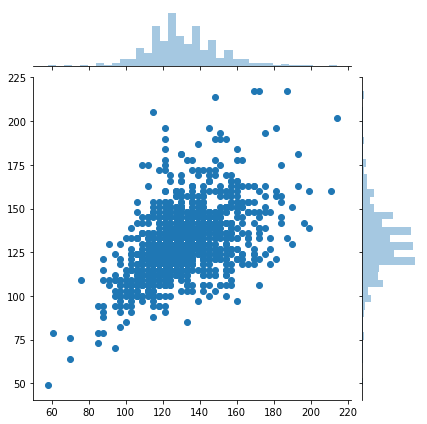

In [18]:
sns.jointplot(dim1,dim2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape = (130,130,3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

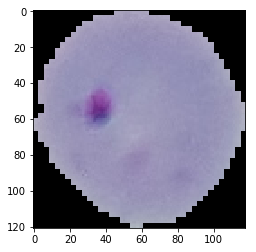

In [24]:
para_img = imread(para_cell)
plt.imshow(para_img)

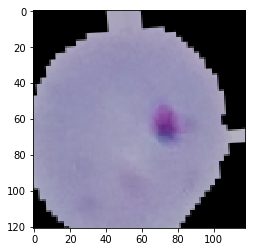

In [25]:
plt.imshow(image_gen.random_transform(para_img))

In [26]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [27]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [28]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [31]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
batch_size = 2**4

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 288s 184ms/step - accuracy: 0.5416 - loss: 0.9776 - val_loss: 0.6779 - val_accuracy: 0.5719
Epoch 2/20
1560/1560 [==============================] - 277s 178ms/step - accuracy: 0.5832 - loss: 0.6764 - val_loss: 0.6803 - val_accuracy: 0.5612
Epoch 3/20
1560/1560 [==============================] - 293s 188ms/step - accuracy: 0.5897 - loss: 0.6733 - val_loss: 0.6708 - val_accuracy: 0.6035
Epoch 4/20
1560/1560 [==============================] - 297s 191ms/step - accuracy: 0.5978 - loss: 0.6724 - val_loss: 0.6697 - val_accuracy: 0.6104
Epoch 5/20
1560/1560 [==============================] - 301s 193ms/step - accuracy: 0.5847 - loss: 0.6854 - val_loss: 0.6813 - val_accuracy: 0.5765
Epoch 6/20
1560/1560 [==============================] - 293s 188ms/step - accuracy: 0.5970 - loss: 0.6707 - val_loss: 0.6566 - val_accuracy: 0.6081
Epoch 7/20
1560/1560 [==============

In [40]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.18873117864131927, 0.938076913356781]

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [43]:
predictions = pred > 0.5

In [44]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [45]:
pred

array([[9.0572238e-03],
       [1.5002489e-04],
       [1.1457801e-03],
       ...,
       [9.6162367e-01],
       [9.5450622e-01],
       [9.6348494e-01]], dtype=float32)

In [46]:
len(pred)

2600

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [51]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1300
           1       0.92      0.96      0.94      1300

   micro avg       0.94      0.94      0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [52]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1199,  101],
       [  55, 1245]])

In [53]:
from tensorflow.keras.preprocessing import image

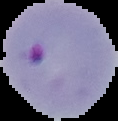

In [54]:
image.load_img(para_cell)

In [55]:
type(image.load_img(para_cell))

PIL.PngImagePlugin.PngImageFile

In [56]:
my_image = image.load_img(para_cell,target_size=image_shape)

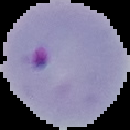

In [57]:
my_image

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [59]:
my_img_arr = image.img_to_array(my_image)

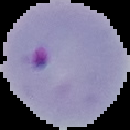

In [60]:
my_image

In [62]:
my_img_arr.shape

(130, 130, 3)

In [63]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [64]:
my_img_arr.shape

(1, 130, 130, 3)

In [65]:
model.predict(my_img_arr)

array([[0.02684569]], dtype=float32)

In [66]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}